Задание 1

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm


plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [107]:
import warnings
warnings.filterwarnings("ignore")

Задание 1

До:	(404, 13)
После:	(404, 2)


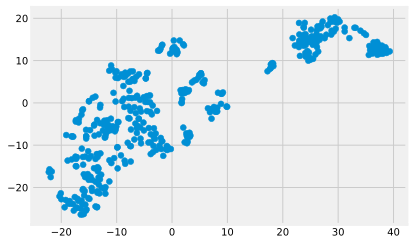

In [90]:
boston = load_boston()
scaler = StandardScaler()

data = boston["data"]
target = boston["target"]
feature_names = boston["feature_names"]

X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))


plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

Задание 2

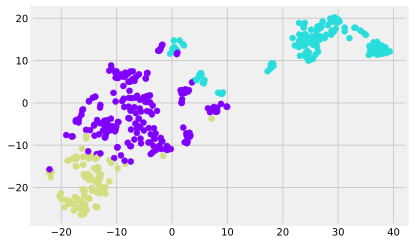

In [108]:
numb_cl = 3

KMeans_model = KMeans(n_clusters=numb_cl, max_iter=100, random_state=42)
KMeans_model.fit(X_train_scaled)
predicted_label = KMeans_model.labels_

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

colors = cm.rainbow(np.linspace(0, 1, numb_cl + 1))

for id, (x, y) in enumerate(X_train_tsne):
    plt.scatter(x, y, color=colors[predicted_label[id]])

plt.show()

In [109]:
X_train['lable_clusters'] = KMeans_model.labels_
ag = X_train.groupby(['lable_clusters']).agg({'CRIM':'sum'})

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(ag)

                      CRIM
lable_clusters            
0                 80.53710
1               1371.22261
2                  6.32664


Задание 3

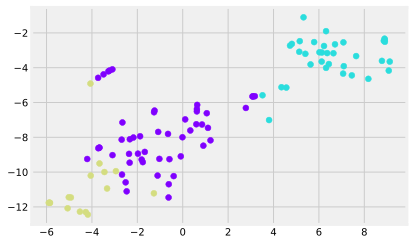

In [110]:
predicted_label = KMeans_model.predict(X_test_scaled)

X_test_tsne = tsne.fit_transform(X_test_scaled)

for id, (x, y) in enumerate(X_test_tsne):
    plt.scatter(x, y, color=colors[predicted_label[id]])

plt.show()

In [111]:
X_test['lable_clusters'] = predicted_label
ag = X_test.groupby(['lable_clusters']).agg({'CRIM':'sum'})

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(ag)

                     CRIM
lable_clusters           
0                13.57002
1               355.79359
2                 0.99296
